In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
rem= pd.read_csv('rem.csv')
rem.shape

(64075, 24)

In [3]:
rem.head()

,agebin,education_s,iincomebin,work_industry,gender_d,wfh_days_postCOVID_ss,wfh_days_postCOVID_boss_ss,workstatus_current_new,wfh_top3benefits_commute,wfh_top3benefits_groom,wfh_top3benefits_flex,wfh_top3benefits_meetings,wfh_top3benefits_quiet,wfh_top3benefits_family,wfh_top3benefits_other,wbp_top3benefits_collab,wbp_top3benefits_social,wbp_top3benefits_facetime,wbp_top3benefits_equip,wbp_top3benefits_quiet,wbp_top3benefits_bound,wbp_top3benefits_other,year,month
0,3,5,3.0,1.0,1.0,2,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2023,9
1,3,4,2.0,6.0,2.0,3,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2023,8
2,3,5,3.0,1.0,1.0,5,2.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2023,9
3,3,5,2.0,12.0,1.0,3,7.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2022,5
4,5,3,2.0,8.0,1.0,5,5.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2022,7


In [4]:
rem=rem.drop(['wfh_days_postCOVID_boss_ss'],axis=1)
rem.head()

,agebin,education_s,iincomebin,work_industry,gender_d,wfh_days_postCOVID_ss,workstatus_current_new,wfh_top3benefits_commute,wfh_top3benefits_groom,wfh_top3benefits_flex,wfh_top3benefits_meetings,wfh_top3benefits_quiet,wfh_top3benefits_family,wfh_top3benefits_other,wbp_top3benefits_collab,wbp_top3benefits_social,wbp_top3benefits_facetime,wbp_top3benefits_equip,wbp_top3benefits_quiet,wbp_top3benefits_bound,wbp_top3benefits_other,year,month
0,3,5,3.0,1.0,1.0,2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2023,9
1,3,4,2.0,6.0,2.0,3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2023,8
2,3,5,3.0,1.0,1.0,5,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2023,9
3,3,5,2.0,12.0,1.0,3,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2022,5
4,5,3,2.0,8.0,1.0,5,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2022,7


#### Age
* label define agebin_lbl 2 "20 - 29", add
* label define agebin_lbl 3 "30 - 39", add
* label define agebin_lbl 4 "40 - 49", add
* label define agebin_lbl 5 "50 - 64", add
********************************************************************************
#### Gender [Note: gender_d includes the "Other/prefer not to say option" while gender focuses on male/female (sex only)]
* label define gender_lbl 1 "Female"
* label define gender_lbl 2 "Male", add
* label define gender_lbl 3 "Other/prefer not to say", add
********************************************************************************
#### Education 
##### label define education_s_lbl 
* 1 "Less than high-school degree"
* 2 "High-school degree", add
* 3 "1 to 3-years of college", add
* 4 "4-year college degree", add
* 5 "Graduate degree", add
********************************************************************************
#### Work Status 
##### label define workstatus_current_new
1 "Working for pay"

2 "Employed and paid, but not working" 

3 "Unemployed, searching" 

4 "Unemployed, awaiting recall" 

5 "Out of the labor force"

6 "Other"
********************************************************************************
#### Industry of current job
##### work_industry_lbl
1 "Agriculture", 

2 "Arts & Entertainment",

3 "Finance & Insurance"

4 "Construction" 

5 "Education"

6 "Health Care & Social Assistance"

7 "Hospitality & Food Services"

8 "Information"

9 "Manufacturing"

10 "Mining"

11 "Professional & Business Services"

12 "Real Estate"

13 "Retail Trade"

14 "Transportation and Warehousing"

15 "Utilities"

16 "Wholesale Trade"

17 "Government"

18 "Other"
********************************************************************************
#### Income categories (coarse and fine)
label define iincomebin_lbl

0 "$10k to $20k" 

1 "$20k to $50k" 

2 "$50k to $100k" 

3 "$100k to $150k" 

4 "$150k+"

********************************************************************************
#### Employer planned post-COVID working from home days, for both categorical versions (bundled and unbundled "Rarely" and "Never" categories)
##### wfh_days_postCOVID_boss_ss_lbl
1 "Rarely or never"

2 "1 day per week"

3 "2 days per week"

4 "3 days per week"

5 "4 days per week"

6 "5 day per week"

7 "No clear plans from employer"

8 "No employer"

*******************************************************************************
#### Desired post-COVID working from home days, for both categorical versions (bundled and unbundled "Rarely" and "Never" categories)
##### wfh_days_postCOVID_ss_lbl
1 "Rarely or never"

2 "1 day per week"

3 "2 days per week"

4 "3 days per week"

5 "4 days per week"

6 "5 days per week"
********************************************************************************
#### Top 3 Benefits WFH / WBP
wfh_top3benefits_commute "Top 3 benefits of WFH include: No commute"

wfh_top3benefits_groom "Top 3 benefits of WFH include: Less time getting ready"

wfh_top3benefits_flex "Top 3 benefits of WFH include: Flexibility on when I work"

wfh_top3benefits_meetings "Top 3 benefits of WFH include: Fewer meetings"

wfh_top3benefits_quiet  "Top 3 benefits of WFH include: Individual quiet time"

wfh_top3benefits_family  "Top 3 benefits of WFH include: More time with family/friends"

wfh_top3benefits_other  "Top 3 benefits of WFH include: Other"
_ _ _ _
wbp_top3benefits_collab "Top 3 benefits of WBP include: Face-toface collaboration" 

wbp_top3benefits_social "Top 3 benefits of WBP include: Socializing" 

wbp_top3benefits_facetime "Top 3 benefits of WBP include: Face time with manager"

wbp_top3benefits_equip "Top 3 benefits of WBP include: Better equipment"

wbp_top3benefits_quiet "Top 3 benefits of WBP include: Quiet"

wbp_top3benefits_bound "Top 3 benefits of WBP include: Work/personal time boundaries"

wbp_top3benefits_other  "Top 3 benefits of WBP include: Other"

In [5]:
## Split cat num

In [6]:
cat_features = rem[['gender_d','work_industry']]

In [7]:
cat_features = cat_features.astype(object)
cat_features.dtypes

gender_d         object
work_industry    object
dtype: object

In [8]:
num_features = rem[['agebin','wfh_days_postCOVID_ss','workstatus_current_new','wfh_top3benefits_commute','wfh_top3benefits_groom','wfh_top3benefits_flex','wfh_top3benefits_meetings','wfh_top3benefits_quiet','wfh_top3benefits_family','wbp_top3benefits_collab','wbp_top3benefits_social','wbp_top3benefits_facetime','wbp_top3benefits_equip','wbp_top3benefits_quiet','wbp_top3benefits_bound']]

In [9]:
num_features

,agebin,wfh_days_postCOVID_ss,workstatus_current_new,wfh_top3benefits_commute,wfh_top3benefits_groom,wfh_top3benefits_flex,wfh_top3benefits_meetings,wfh_top3benefits_quiet,wfh_top3benefits_family,wbp_top3benefits_collab,wbp_top3benefits_social,wbp_top3benefits_facetime,wbp_top3benefits_equip,wbp_top3benefits_quiet,wbp_top3benefits_bound
0,3,2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,3,3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,3,5,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,3,3,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
4,5,5,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64070,2,3,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
64071,4,6,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
64072,5,6,2.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
64073,4,6,2.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0


In [10]:
# for i in cat_features.columns:
# #     print(cat_features[i].dtype)

In [11]:
# for i in num_features.columns:
# #     print(num_features[i].dtype)

In [12]:
## convert wfh_days_postCOVID_ss to two posibilities - 0 ="Rarely or never"+"1 day per week" & 1 = all other numbers. 
## This will create two possible employees - those who want to wfh and those who don't 
mapping = {
    1: 0,
    2: 0,
    3: 1,
    4: 1,
    5: 1,
    6: 1,
    7: 0,
    8: 0
}

# Replace the values according to the mapping
num_features['wfh_days_postCOVID_ss'] = num_features['wfh_days_postCOVID_ss'].replace(mapping)

C:\Users\Dana\AppData\Local\Temp\ipykernel_6796\2241851044.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_features['wfh_days_postCOVID_ss'] = num_features['wfh_days_postCOVID_ss'].replace(mapping)


In [13]:
num_features['wfh_days_postCOVID_ss'].value_counts(dropna=False)

wfh_days_postCOVID_ss
1    48691
0    15384
Name: count, dtype: int64

In [14]:
## the target column is 'wfh_days_postCOVID_ss'

In [15]:
## Split

In [16]:
numerical = num_features
numerical = numerical
print(numerical.shape)

(64075, 15)


In [17]:
categorical = cat_features
print(categorical.shape)

(64075, 2)


In [18]:
X = pd.concat([categorical,numerical],axis=1)
X = X.drop(['wfh_days_postCOVID_ss'],axis=1)
y = numerical['wfh_days_postCOVID_ss']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=25)

In [20]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape) 

(48056, 16)

(16019, 16)

(48056,)

(16019,)

In [21]:
# Split Xtrain, Xtest to cat num
X_train_cat = X_train.select_dtypes(object)
X_test_cat = X_test.select_dtypes(object)

In [22]:
X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)

In [23]:
display(X_train_cat.shape)
display(X_test_cat.shape)
display(X_train_num.shape)
display(X_test_num.shape)

(48056, 2)

(16019, 2)

(48056, 14)

(16019, 14)

In [24]:
### Encoding on train and test seperatly

In [25]:
encoder = OneHotEncoder(drop='first').fit(X_train_cat)
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
X_train_cat_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(), columns=cols)
X_test_cat_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(), columns=cols)

In [26]:
# Scaling
transformer = MinMaxScaler().fit(X_train_num)

x_normalized_train = transformer.transform(X_train_num)
X_train_num = pd.DataFrame(x_normalized_train, columns=X_train_num.columns)

x_normalized_test = transformer.transform(X_test_num)
X_test_num = pd.DataFrame(x_normalized_test, columns=X_test_num.columns)

In [27]:
# Concat Xtrain num & Xtrain cat

In [28]:
X_train_full = pd.concat([X_train_num,X_train_cat_encode],axis=1)
X_test_full = pd.concat([X_test_num,X_test_cat_encode],axis=1)

In [29]:
X_train_full

,agebin,workstatus_current_new,wfh_top3benefits_commute,wfh_top3benefits_groom,wfh_top3benefits_flex,wfh_top3benefits_meetings,wfh_top3benefits_quiet,wfh_top3benefits_family,wbp_top3benefits_collab,wbp_top3benefits_social,wbp_top3benefits_facetime,wbp_top3benefits_equip,wbp_top3benefits_quiet,wbp_top3benefits_bound,gender_d_2.0,gender_d_3.0,work_industry_2.0,work_industry_3.0,work_industry_4.0,work_industry_5.0,work_industry_6.0,work_industry_7.0,work_industry_8.0,work_industry_9.0,work_industry_10.0,work_industry_11.0,work_industry_12.0,work_industry_13.0,work_industry_14.0,work_industry_15.0,work_industry_16.0,work_industry_17.0,work_industry_18.0
0,0.333333,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.333333,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.666667,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.333333,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.333333,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48051,0.333333,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48052,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48053,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48054,0.666667,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
## Modeling : 

In [31]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train_full, y_train)

DecisionTreeClassifier(max_depth=2)

In [32]:
print("test data accuracy was ",model.score(X_test_full,y_test))
# 100% on training data
print("train data accuracy was ",model.score(X_train_full,y_train))

test data accuracy was  0.7558524252450215
train data accuracy was  0.7612576993507575


In [33]:
model.feature_importances_

array([0.        , 0.56103158, 0.        , 0.        , 0.31125734,
       0.        , 0.        , 0.        , 0.        , 0.12771108,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [34]:
columns = X.columns.values
columns

array(['gender_d', 'work_industry', 'agebin', 'workstatus_current_new',
       'wfh_top3benefits_commute', 'wfh_top3benefits_groom',
       'wfh_top3benefits_flex', 'wfh_top3benefits_meetings',
       'wfh_top3benefits_quiet', 'wfh_top3benefits_family',
       'wbp_top3benefits_collab', 'wbp_top3benefits_social',
       'wbp_top3benefits_facetime', 'wbp_top3benefits_equip',
       'wbp_top3benefits_quiet', 'wbp_top3benefits_bound'], dtype=object)

In [35]:
X.shape, X_train.shape, X_train_full.shape

((64075, 16), (48056, 16), (48056, 33))

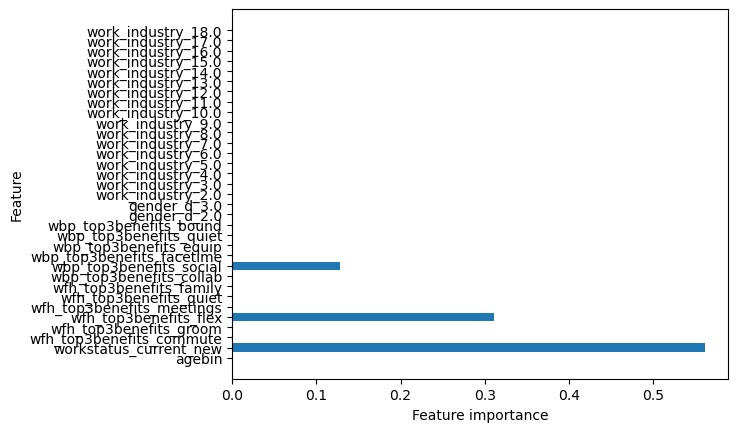

In [36]:
import matplotlib.pyplot as plt
def plot_feature_importances(model, namelist):
    n_features = len(model.feature_importances_)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), namelist)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(model, X_train_full.columns)

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(max_depth=5, # max number of questions to ask
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.8, # fraction of X-train to use in each tree
                             random_state=42)
model2 = clf.fit(X_train_full, y_train)

y_pred = clf.predict(X_test_full)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

wfh_days_postCOVID_ss
1    12108
0     3911
Name: count, dtype: int64

array([[    0,  3911],
       [    0, 12108]], dtype=int64)

In [38]:
print("test data accuracy was ",model2.score(X_test_full,y_test))
# 100% on training data
print("train data accuracy was ",model2.score(X_train_full,y_train))

test data accuracy was  0.7558524252450215
train data accuracy was  0.7612576993507575


In [39]:
## Data is imbalanced

In [40]:
## concat Xtrain and Ytrain for sampling
X_train_full.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
trainset = pd.concat([X_train_full, y_train], axis=1)
display(trainset.shape)
trainset.head()

(48056, 34)

,agebin,workstatus_current_new,wfh_top3benefits_commute,wfh_top3benefits_groom,wfh_top3benefits_flex,wfh_top3benefits_meetings,wfh_top3benefits_quiet,wfh_top3benefits_family,wbp_top3benefits_collab,wbp_top3benefits_social,wbp_top3benefits_facetime,wbp_top3benefits_equip,wbp_top3benefits_quiet,wbp_top3benefits_bound,gender_d_2.0,gender_d_3.0,work_industry_2.0,work_industry_3.0,work_industry_4.0,work_industry_5.0,work_industry_6.0,work_industry_7.0,work_industry_8.0,work_industry_9.0,work_industry_10.0,work_industry_11.0,work_industry_12.0,work_industry_13.0,work_industry_14.0,work_industry_15.0,work_industry_16.0,work_industry_17.0,work_industry_18.0,wfh_days_postCOVID_ss
0,0.333333,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.333333,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,0.666667,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.333333,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.333333,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [41]:
trainset.wfh_days_postCOVID_ss.value_counts()

wfh_days_postCOVID_ss
1    36583
0    11473
Name: count, dtype: int64

In [42]:
from sklearn.utils import resample

category_0 = trainset[trainset['wfh_days_postCOVID_ss'] == 0]
category_1 = trainset[trainset['wfh_days_postCOVID_ss'] == 1]

In [43]:
## Downsampling (undersampling)

In [44]:
category_1_undersampled = resample(category_1,
                                   replace=False,
                                   n_samples = len(category_0))
print(category_1_undersampled.shape)
print(category_0.shape)

(11473, 34)
(11473, 34)


In [45]:
data_downsampled = pd.concat([category_1_undersampled, category_0], axis=0)
data_downsampled['wfh_days_postCOVID_ss'].value_counts()

wfh_days_postCOVID_ss
1    11473
0    11473
Name: count, dtype: int64

In [46]:
## Upsampling (oversampling)

In [47]:
category_0_oversampled = resample(category_0,
                                   replace=True,
                                   n_samples = len(category_1))
print(category_0_oversampled.shape)
print(category_1.shape)

(36583, 34)
(36583, 34)


In [48]:
data_upsampled = pd.concat([category_1, category_0_oversampled], axis=0)
data_upsampled['wfh_days_postCOVID_ss'].value_counts()

wfh_days_postCOVID_ss
1    36583
0    36583
Name: count, dtype: int64

In [49]:
## Remodeling DecisionTreeClassifier on downsampled 
y_train_down = data_downsampled['wfh_days_postCOVID_ss']
X_train_down = data_downsampled.drop('wfh_days_postCOVID_ss',axis = 1)

In [50]:
model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train_down, y_train_down)

DecisionTreeClassifier(max_depth=2)

In [51]:
print("test data accuracy was ",model.score(X_test_full,y_test))
# 100% on training data
print("train data accuracy was ",model.score(X_train_down,y_train_down))

test data accuracy was  0.4781197328172795
train data accuracy was  0.5580929137976118


In [52]:
model.feature_importances_

array([0.        , 0.54683306, 0.        , 0.        , 0.37541284,
       0.        , 0.        , 0.        , 0.        , 0.07775411,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [53]:
## Remodeling DecisionTreeClassifier on upsampled 
y_train_upsampled = data_upsampled['wfh_days_postCOVID_ss']
X_train_upsampled = data_upsampled.drop('wfh_days_postCOVID_ss',axis = 1)

In [54]:
model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train_upsampled, y_train_upsampled)

DecisionTreeClassifier(max_depth=2)

In [55]:
print("test data accuracy was ",model.score(X_test_full,y_test))
# 100% on training data
print("train data accuracy was ",model.score(X_train_upsampled,y_train_upsampled))

test data accuracy was  0.4781197328172795
train data accuracy was  0.5567750047836427


In [56]:
model.feature_importances_

array([0.        , 0.54082724, 0.        , 0.        , 0.45917276,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [57]:
## Remodeling RandomForestClassifier on downsampled 
clf = RandomForestClassifier(max_depth=5, # max number of questions to ask
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.8, # fraction of X-train to use in each tree
                             random_state=42)
model2 = clf.fit(X_train_down, y_train_down)

y_pred = clf.predict(X_test_full)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

wfh_days_postCOVID_ss
1    12108
0     3911
Name: count, dtype: int64

array([[2300, 1611],
       [4634, 7474]], dtype=int64)

In [58]:
print("test data accuracy was ",model.score(X_test_full,y_test))
# 100% on training data
print("train data accuracy was ",model.score(X_train_down,y_train_down))

test data accuracy was  0.4781197328172795
train data accuracy was  0.5580929137976118


In [59]:
## Remodeling RandomForestClassifier on upsampled 
clf = RandomForestClassifier(max_depth=5, # max number of questions to ask
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.8, # fraction of X-train to use in each tree
                             random_state=42)
model2 = clf.fit(X_train_upsampled, y_train_upsampled)

y_pred = clf.predict(X_test_full)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

wfh_days_postCOVID_ss
1    12108
0     3911
Name: count, dtype: int64

array([[2278, 1633],
       [4483, 7625]], dtype=int64)

In [60]:
print("test data accuracy was ",model.score(X_test_full,y_test))
# 100% on training data
print("train data accuracy was ",model.score(X_train_upsampled,y_train_upsampled))

test data accuracy was  0.4781197328172795
train data accuracy was  0.5567750047836427


In [61]:
##               Predicted 0   Predicted 1
## Actual 0        TN                    FP
## Actual 1        FN                    TP

# tn - true negative
# fp - false positive
# you want to maximise TN and TP